In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
Vf = 0.75
Vc = 0.5 * Vf
Ve = .8 + .2 * Vf

In [25]:
A = 1000 # km2
V = 100 # hm3

In [27]:
k = 0.2 #np.max(1 - 5 * V * 1e6 * (1 - Vf) / (A * 1e-6), 0)
k

0.2

In [95]:
Qmin = 2.5
Qf = 0.3 * 500
Qn = 15
Qc = Qn * Vc / Vf

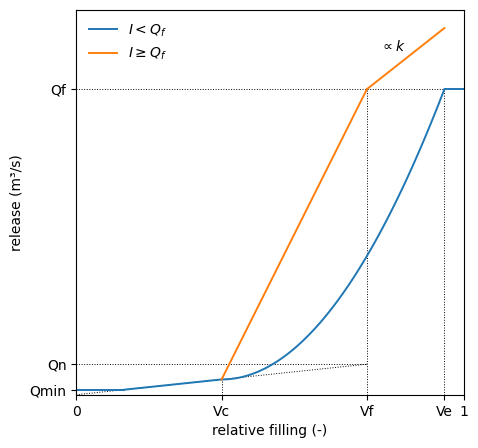

In [96]:
I = 2 * Qf

fig, ax = plt.subplots(figsize=(5, 5))
lw = 1.4

V0 = Vf * Qmin / Qn
ax.hlines(Qmin, 0, V0, color='C0', lw=lw)

x1 = np.array([V0, Vc])
ax.plot(x1, Qn * x1 / Vf, c='C0', lw=lw)
ax.vlines(Vc, 0, Qc, color='k', ls=':', lw=lw / 2, zorder=0)

x = np.array([0, Vf]) 
ax.plot(x, Qn * x / Vf, c='k', ls=':', lw=lw / 2, zorder=0)

x3 = np.linspace(Vc, Ve, 100)
ax.plot(x3, Qn * Vc / Vf + ((x3 - Vc) / (Ve - Vc))**2 * (Qf - Qc), c='C0', lw=lw,
       label=r'$I < Q_f$')

x2 = np.array([Vc, Vf])
ax.plot(x2, Qn * Vc / Vf + (x2 - Vc) / (Vf - Vc) * (Qf - Qc), c='C1', lw=lw,
       label=r'$I \geq Q_f$')

ax.hlines(Qn, 0, Vf, color='k', ls=':', lw=lw / 2, zorder=0)
ax.vlines(Vf, 0, Qf, color='k', ls=':', lw=lw / 2, zorder=0)



ax.hlines(Qf, Ve, 1, color='C0', lw=lw)

x5 = np.array([Vf, Ve])
ax.plot(x5, Qf + k * (x5 - Vf) / (Ve - Vf) * (I - Qf), c='C1', lw=lw)
ax.hlines(Qf, 0, Ve, color='k', ls=':', lw=lw / 2, zorder=0)
ax.vlines(Ve, 0, Qf, color='k', ls=':', lw=lw / 2, zorder=0)

ax.text(np.mean([Vf, Ve]), Qf * 1.125, r'$\propto k$', ha='right')#, transform=ax.transAxes)

ax.set_xticks([0, Vc, Vf, Ve, 1])
ax.set_xticklabels([0, 'Vc', 'Vf', 'Ve', 1])
ax.set_yticks([Qmin, Qn, Qf])
ax.set_yticklabels(['Qmin', 'Qn', 'Qf'])
ax.set(
    xlim=(0, 1),
    xlabel='relative filling (-)',
    ylim=(0, None),
    ylabel='release (m³/s)'
)
ax.legend(frameon=False);

plt.savefig('../../lisflood-model/media/reservoirs_routine.png', dpi=300, bbox_inches='tight')